In [1]:
!pip --version

# pip install --upgrade pip 


pip 24.0 from C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\pip (python 3.9)



In [2]:
!python -V

# Python 3.9.13

Python 3.9.19


In [30]:
#pip install keras==2.15.0


In [28]:
#pip install tensorflow==2.15.0


In [34]:
pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [19]:
#Keras import 및 버전 확인
# Miniconda : 2.10.0
# CoLab : 2.15.0

import keras
keras.__version__

'2.10.0'

In [10]:
#CoLab : 2.10.12
# Miniconda : 3.9.18
# Colab : 2.10.12
# Local : 3.9.13

!python -V

Python 3.9.13


In [4]:
!nvidia-smi

Thu Mar 28 22:53:59 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
|  0%   37C    P8              3W /  220W |       0MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Data loading

#### mnist(Modified National Institute of Standards and Technology database)

In [20]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### Python 데이터 타입
* > list()  : [ ], 순서가 있고(인덱스 기반 접근), 중복이 가능하며, 수정이 가능
  + 삽입(append), 삭제(remove), 정렬(sort)

* > tuple() : ( ), 순서가 있고(인덱스 기반 접근), 중복이 가능하며, 수정이 불가능(Immutable) *수정불가능한 리스트
  + 수정이 불가능하므로 append, remove, sort 불가능, count 가능 *속도가 빠름

* > set()   : { }, 순서가 없고, 중복이 불가능하며, 수정이 가능

* > dict()  : {key:value}, 순서가 없고, 중복이 불가능하면, 수정이 가능, key로만 접근
  + map이라고 생각하면 됨.
  + keys(), values()로 리턴
 

#### Numpy
* numpy : 파이썬의 수치해석용 라이브러리

* ndarray : Numpy의 핵심인 다차원 행렬 자료구조 클래스

* https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

* > Python 리스트
  + 여러가지 타입의 원소
  + linked List 구현
  + 메모리 용량이 크고 속도가 느림
  + 벡터화 연산 불가
  + list는 여러 타입이 존재할 수 있다

* > NumPy ndarray
  + 동일 타입의 원소(int, float, nbyte)
  + contiguous memory layout
  + 메모리 최적화, 계산 속도 향상
  + 벡터화 연산 가능
  + shape/dtype/ndim/size/nbytes
  + ndarray는 하나의 타입만 존재할 수 있다
  + axis는 따라서 0(차원), 1(행), 2(열)의 값을 가진다
  + int(32), int8, float(32)

In [21]:
# train_images의 형태와 타입을 출력
print('train images shape / type ; ', train_images.shape, type(train_images))

# train_labels의 형태와 타입을 출력
print('train labels shape / type ; ', train_labels.shape, type(train_labels))




#print('train img shape / type ; ', train_images.shape, type(train_images))

train images shape / type ;  (60000, 28, 28) <class 'numpy.ndarray'>
train labels shape / type ;  (60000,) <class 'numpy.ndarray'>


In [17]:
# 연습
import numpy as np
a = [[1, 2, 3, 4, 5],[6, 7, 8, 9, 10]]
a_ndarray = np.array(a, int)

print("shape:",a_ndarray.shape)
print("dtype:",a_ndarray.dtype)
print("ndim :",a_ndarray.ndim)
print("nbytes:",a_ndarray.nbytes) # int 32=>4bytes * 5 = 20bytes
print("a_ndarray[0, 1]:",a_ndarray[0, 1])
print("a_ndarray:",a_ndarray)

shape: (2, 5)
dtype: int32
ndim : 2
nbytes: 40
a_ndarray[0, 1]: 2
a_ndarray: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [27]:
# 연습
d = [[[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
     [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
     [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
     [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]],
     [[1, 2, 5, 8], [1, 2, 5, 8], [1, 2, 5, 8]]]  # 4x3x4 3차원 배열 선언
d_ndarray = np.array(d, int)
print("shape:", d_ndarray.shape) # 3rd order tensor
print("ndim:", d_ndarray.ndim) # number of dimensions
print("size:", d_ndarray.size) # 48 == 4x3x4
print("nbytes:", d_ndarray.nbytes) # 48 * 4bytes == 4x3x4

d_ndarray = np.array(d, dtype=np.int8)
print("size:", d_ndarray.size) # 48 == 4x3x4
print("nbytes:", d_ndarray.nbytes) # 48 * 4bytes == 4x3x4

shape: (5, 3, 4)
ndim: 3
size: 60
nbytes: 240
size: 60
nbytes: 60


## 2. Data check

In [22]:
print('train img shape / type ; ', train_images.shape, type(train_images))
print('train label shape / type ; ', train_labels.shape, type(train_labels))
print('test img shape / type ; ', test_images.shape, type(test_images))
print('test label shape / type ; ', test_labels.shape, type(test_labels))

train img shape / type ;  (60000, 28, 28) <class 'numpy.ndarray'>
train label shape / type ;  (60000,) <class 'numpy.ndarray'>
test img shape / type ;  (10000, 28, 28) <class 'numpy.ndarray'>
test label shape / type ;  (10000,) <class 'numpy.ndarray'>


###2-1. image - label 간 매칭을 확인해보세요.

In [50]:
import matplotlib.pyplot as plt

random_val = 123
#print(train_images[1597])

for row in train_images[random_val]:
    print(' '.join([f"{pixel:3d}" for pixel in row]))



plt.imshow(train_images[random_val])

print("--------------------------------------------------------------------------------")
print("Train Label:[", train_labels[random_val], "]")
print("--------------------------------------------------------------------------------")

TypeError: 'numpy.float32' object is not iterable

In [24]:
train_labels[1000]

0

###2-2. 데이터 분포를 확인해보세요.


In [25]:
label_set = set(train_labels)
lable_list = list(set(train_labels))

# set => {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} => 요소의 집합(순서없음) => 요소에 접근할수 없어서 list나 tuple로 변환해서 사용
# list => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] => 요소의 집합(순서있음)



In [26]:
label_list = list(set(train_labels))
label_list.sort()
label_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [27]:
len(label_list)
# 10

for i in range(len(label_list)):
    print(f"{i} : {label_list[i]}")

0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
7 : 7
8 : 8
9 : 9


In [28]:
label_count = []
for label in label_list:
    count = list(train_labels).count(label)
    label_count.append(count)
    print("label_count f{label}",  label_count)
#print(label_count)


label_count f{label} [5923]
label_count f{label} [5923, 6742]
label_count f{label} [5923, 6742, 5958]
label_count f{label} [5923, 6742, 5958, 6131]
label_count f{label} [5923, 6742, 5958, 6131, 5842]
label_count f{label} [5923, 6742, 5958, 6131, 5842, 5421]
label_count f{label} [5923, 6742, 5958, 6131, 5842, 5421, 5918]
label_count f{label} [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265]
label_count f{label} [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851]
label_count f{label} [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [29]:
label_count = [list(train_labels).count(label_list[i]) for i in range(len(label_list))]
label_count

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

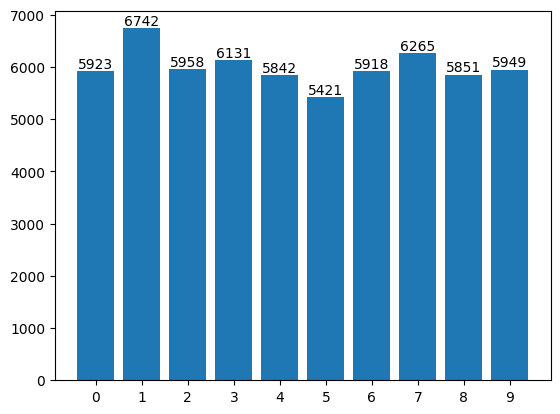

In [30]:
plt.bar(label_list, label_count)
plt.xticks(range(len(label_list)), label_list)

for i, count in enumerate(label_count):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()


<BarContainer object of 10 artists>

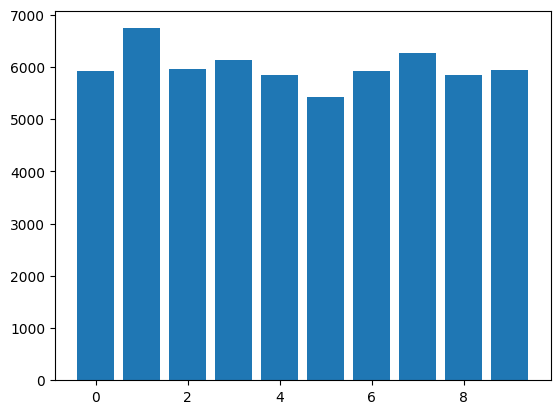

In [31]:
plt.bar(label_list,label_count)

## 3. 모델 설계 및 학습

###3-1. activation function을 변경하고 학습 후 loss curve를 비교해보세요.

activation function 종류 확인 : https://keras.io/api/layers/activations/

- relu, sigmoid, softmax, softplus, softsign, tanh, selu, elu, exponential

###3-2. 각 레이어의 노드 수를 변경하고 학습 후 loss curve를 비교해보세요.

###3-3 모델의 레이어를 변경하고 학습 후 loss curve를 비교해보세요.

###3-4. optimizer를 변경하고 학습 후 loss curve를 비교해보세요.

keras.optimizers 이용 : https://keras.io/api/optimizers/

- optimizer list : SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl


keras fit method argument list

Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Base model

명령어	설명&예시
keras.models.Sequential	- 단순한 순차 딥러닝 모델 설계
keras.Model	 
keras.layers.Input	- input 값 설정
> keras.layers.Input(shape=[25,25], name = 'user_embed)
keras.layers.Flatten	Input 값의 차원을 변환해 주는 함수
> keras.layers.Flatten(input_shape=[28, 28])
keras.layers.Dense	층을 한개 추가 함
> keras.layers.Dense(300, activation='relu')
keras.layers.Concatenate()	- 이름 그대로 input들을 concat함
> keras.layer.Concatenate()([input1_, hidden1])
model.summary()	설계한 딥러닝 모델의 층, 파라미터 수 등 summary 반환
model.compile()	- 사용할 loss ftn, optimizer, metrics, learning rate 등 모델 학습에 사용될 옵션들을 지정함
model.fit	모델을 학습 시킴.
model.evaluate	모델을 평가함
model.predict()	예측 값을 반환함. 0~1 사이의 값
model.save()	HDF5 포맷을 사용하여 모델 구조와 층의 모든 모델 파라미터를 저장함
* Sequential model과 함수형 모델에서만 사용 가능.
> model.save("model_name.h5")
model.load_model()	모델 불러오기
> model.load_model("model_name.h5")
keras.callbacks.ModelCheckpoint()	모델의 체크 포인트 저장
* Sequential model과 함수형 모델에서만 사용 가능.
> keras.callbacks.ModelCheckpoint("model_name.h5", save_best_only=True)
keras.callbacks.EarlyStopping()	- 일정 epoch 동안(patience 매개변수) 모델 성능이 향상되지 않는 경우 stop함.
> keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
사용자정의 callback도 만들 수 있음	

#### Activation Function
* https://keras.io/api/layers/activation_layers/
* > sigmoid 함수 (이진분류의 출력함수)
  - σ′(x)=σ(x)(1−σ(x))
  - 0에서 1사이의 값을 가짐
  - 매우 큰 값을 가지면 함수값은 거의 1이며, 매우 작은 값을 가지면 거의 0이다
  - 초기엔 많이 사용하였지만 지금은 거의 사용안함(Gradient Vanishing 현상, 함수값 중심이 0이 아니라 학습이 느림, exp 함수 사용시 비용이 크다)
  
* > tanh 함수, (Hyperbolic tangent function)
  - tanh(x)=2σ(2x)−1
  - -1에서 1사이의 값
  - sigmoid의 중심값이 0이 아님을 0으로 만드는 함수(gradient vanishing 문제는 여전히 남아있다)
  - 은닉층에 많이 사용
  - *gradient vanishing 문제 :  활성화 함수인 시그모이드(Sigmoid) 함수는 출력값이 0과 1 사이로 제한되며, 입력값이 너무 크거나 작을 때 그 미분값이 매우 작아집니다. 따라서, 심층 신경망에서는 각 레이어를 거치면서 이 작은 미분값들이 곱해지게 되고, 결과적으로 초기 레이어로 전달되는 기울기가 매우 작아질 수 있습니다.

* > ReLU 함수 (Rectified Linear Unit) 
  - f(x)=max(0,x)
  - 0보다 작으면 0, 0보다 크면 기울기 1인 직선(값을 그대로 출력)
  - 은닉층에 많이 사용
  - sigmoid, tanh 함수와 비교시 학습이 훨씬 빨라진다
  - 연산 비용이 크지않고, 구현이 매우 간단
  - Dying ReLU : 

* > Leakly ReLU
  - f(x)=max(0.01x,x)
  - ReLU의 뉴런이 죽는(“Dying ReLU”)현상을 해결하기위해 나온 함수
  - Leakly ReLU는 음수의 x값에 대해 미분값이 0되지 않는다는 점을 제외하면 ReLU와 같은 특성
  - ReLU의 변형으로, 음수 입력에 대해 아주 작은 양의 기울기를 부여합니다. 이는 뉴런이 완전히 죽지 않도록 하여, 학습이 계속될 수 있도록 돕습니다

* > PReLU (Parametric ReLU)
  - f(x)=max(αx,x)
  - Leakly ReLU와 거의 유사하지만 새로운 파라미터 α 를 추가하여 x<0 에서 기울기를 학습할 수 있게 하였다
  - Leaky ReLU의 확장형으로, 음수 입력에 대한 기울기가 학습 가능한 파라미터가 됩니다

* > Exponential Linear Unit(ELU)
  - f(x)=x if x > 0, f(x)=α(ex−1) if x ≤ 0
  - ELU는 비교적 가장 최근에 나온 함수이다. Clevert et al. ,2015
  - ReLU의 모든 장점을 포함한다
  - “Dying ReLU” 문제 해결
  - 출력값이 거의 zero-centered에 가깝다
  - 일반적인 ReLU와 달리 exp함수를 계산하는 비용이 발생한다

* > Maxout 함수
  - f(x)=max(wT1x+b1,wT2x+b2)
  - ReLU가 가지는 모든 장점을 가짐
  - “Dying ReLU” 문제 해결
  - 계산량이 복잡하다는 단점

* > softmax 함수 (다중분류의 출력함수)
  - 시그모이드와 비슷하게, 0~1사이로 변환하여 출력하지만, 출력값들의 합이 1이 되도록 하는 함수

* > 결론
  - 가장 많이 사용되는 함수는 ReLU이다
  - 우선적으로 ReLU를 사용한다
  - ReLU를 사용한 이후 Leakly ReLU등 ReLU계열의 다른 함수도 사용 해본다
  - sigmoid의 경우에는 사용하지 않도록 한다.
  - tanh의 경우도 큰 성능은 나오지 않는다.


  

In [32]:
from keras import models
from keras import layers
#models 모듈에서는 모델을 생성하고 관리하는 데 필요한 기능을 제공
#layers 모듈에서는 신경망의 다양한 층(예: 완전 연결 층, 합성곱 층 등)을 구현할 수 있는 클래스를 제공합니다.

#신경망 모델 생성
# keras에는 세가지 모델 선언 방법이 있음

# 순차모델(Sequential model)
# 함수형 API(Functional API)
# 서브클래싱 API(Subclassing API)

network = models.Sequential()


# Dense
# units : 출력 뉴런의 수
# activation : 활성화 함수(
# - linear:기본값(입력과동일한값을 출력)
# - relu:은닉층에 많이 사용(0이상의값)
# - sigmoid:이중분류(0~1)
# - softmax:다중클래스
# - tanh:은닉층에 많이 사용(-1~1 )
# - selu:고급활성화함수
# input_shape : 입력 형태
# kernel_initializer : 가중치 초기화 방법(uniform: 균등분포, normal: 정규분포, zero: 0으로 초기화, he_normal: He 초기화, glorot_normal: Xavier 초기화)

# model -> dense -> compile -> fit -> evaluate -> predict

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(128, activation='elu'))
network.add(layers.Dense(10, activation='softmax')) #하려는게 0~10의 분류문제이므로 10으로 지정 확률로하는 softmax => 분류문제는 클래스 갯수 softmax를 일반적으로 사용


In [ ]:
from keras import models
from keras import layers
#models 모듈에서는 모델을 생성하고 관리하는 데 필요한 기능을 제공
#layers 모듈에서는 신경망의 다양한 층(예: 완전 연결 층, 합성곱 층 등)을 구현할 수 있는 클래스를 제공합니다.

#신경망 모델 생성
# keras에는 세가지 모델 선언 방법이 있음
# 순차모델(Sequential model)
# 함수형 API(Functional API)
# 서브클래싱 API(Subclassing API)
keras_model = models.Sequential()


#keras.layers.Dense => 층을 한개 추가함.

# 
keras_model.add(layers.Dense(512, activation='tanh', input_shape=(28 * 28,)))
keras_model.add(layers.Dense(128, activation='sigmoid'))
keras_model.add(layers.Dense(10, activation='softmax')) #하려는게 0~10의 분류문제이므로 10으로 지정 확률로하는 softmax => 분류문제는 클래스 갯수 softmax를 일반적으로 사용

In [33]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 분류는 categorical_cross...사용

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
#트레인 6만장 0~255 픽셀
#스케일링해줌
#786 언디센트?로 바뀜

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [37]:
train_images[0].shape

(784,)

In [38]:
#원-핫 인코딩

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
train_labels.shape

(60000, 10)

In [40]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Keras
 * > 1.model
   - Sequential
 * > 2.layer(Dense)
   - ReLU, LeakyReLU, PReLU, ELU
 * > 3.compile
   - optimizer='adam',
     + 학습 과정에서 사용할 최적화 알고리즘을 지정하는 중요한 인자입니다. 최적화 알고리즘은 모델의 가중치를 업데이트하는 방법을 결정하며, 이를 통해 손실 함수(loss function)의 값을 최소화
     + from tensorflow.keras.optimizers import Adam
     + optimizer = Adam(lr=0.001)
     + lr : 학습률
   - loss='categorical_crossentropy',
     + 회귀 문제의 손실 함수 : MSE(평균 제곱 오차), MAE(평균 절대 오차)
     + 분류 문제의 손실 함수
     + Binary Crossentropy (이진 크로스엔트로피): 두 개의 클래스 중 하나를 예측
     + Categorical Crossentropy (범주형 크로스엔트로피): 세 개 이상의 클래스가 있는 다중 클래스 분류 문제
     + Sparse Categorical Crossentropy: Categorical Crossentropy와 유사하지만, 이 함수는 정수 형태의 레이블을 직접 사용할 수 있어 레이블 인코딩 과정을 간소화
   - metrics=['accuracy']
     + 정확도 (Accuracy): 분류 문제에서 널리 사용되며, 올바르게 분류된 예시의 비율을 나타냅니다. 이진 분류와 다중 분류 모두에서 사용할 수 있습니다.
     + 정밀도 (Precision): 양성으로 예측된 경우 중 실제로 양성인 경우의 비율입니다. 특정 클래스의 예측을 얼마나 정확하게 했는지를 측정합니다.
     + 재현율 (Recall): 실제 양성 중 모델이 양성으로 올바르게 예측한 비율입니다. 특정 클래스를 얼마나 잘 감지하는지를 나타냅니다.
     + F1 점수 (F1 Score): 정밀도와 재현율의 조화 평균입니다. 두 지표를 모두 고려할 때 유용합니다.
     + Mean Absolute Error (MAE): 회귀 문제에서 사용되며, 예측 값과 실제 값 사이의 절대 차이의 평균을 나타냅니다.
     + Mean Squared Error (MSE): 회귀 문제에서 사용되며, 예측 값과 실제 값 사이의 제곱 차이의 평균을 나타냅니다.
 * > 4.fit
   - epochs
     + 전체 데이터셋을 한 번 모델을 통해 전달하는 것을 의미
     + from tensorflow.keras.callbacks import EarlyStopping
     + 같은 데이터셋이라도 가중치를 변경하면서 학습
   - batch_size
     + 몇 개의 샘플로 가중치를 갱신할 것인지 설정
   - validation_split
 * > 5.evaluate
 * > 6.predict
 

In [41]:
import time

start_time = time.time()

history = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

end_time = time.time()

execution_time = end_time - start_time

# 실행 시간 출력
print(f"실행 시간: {execution_time}초")


# 6만장 중 10%뺀 5.4만장 중 배치사이즈 128로 나누면 iteration 갯수가 나옴
# 트레인데이터셋에서 90프로로 학습하고 10프로만 검증
# 향후에 테스트데이터셋으로 검증

# 4070 Super : 10.83초
# T4 : 19.11초
# CPU(Intel(R) Core(TM) i5-6500 CPU @ 3.20GHz) : 30.64초

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.2319 - accuracy: 0.9304 - val_loss: 0.0929 - val_accuracy: 0.9703
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9746 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0675 - val_accuracy: 0.9795
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0688 - val_accuracy: 0.9812
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0811 - val_accuracy: 0.9777
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.0840 - val_accuracy: 0.9773
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0774 - val_accuracy: 0.9797
Epoch 

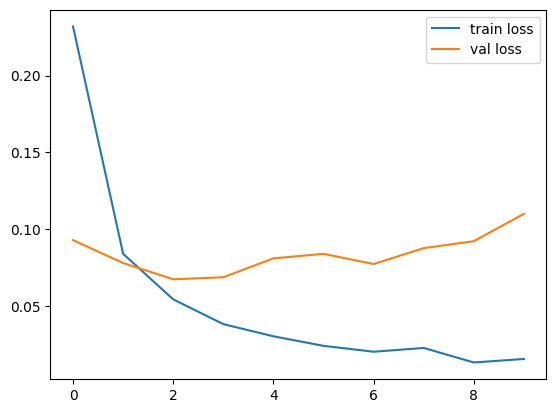

In [42]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss.png')

# 오버핏 확인 => 오버핏 이후 성능에 변화가 없으므로 그냥 사용하자

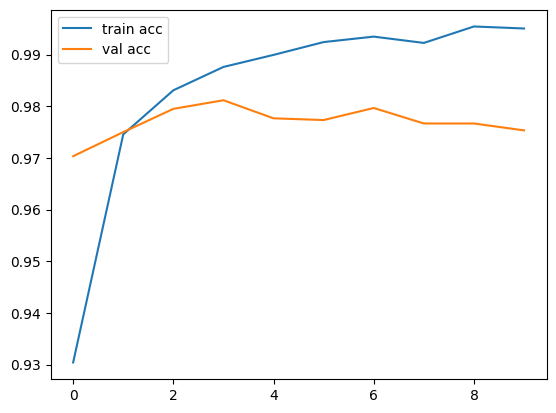

In [43]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc.png')

# 오버핏 확인

In [44]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9739


In [45]:
print('test_acc:', test_acc)

test_acc: 0.9739000201225281


ValueError: in user code:

    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HyeJinKyu\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28)


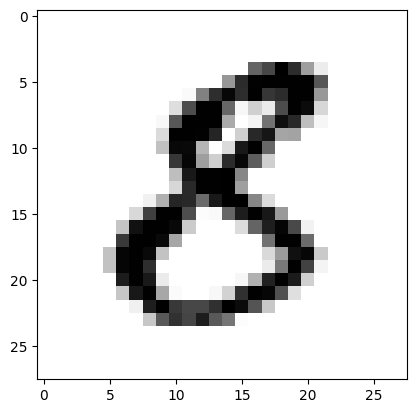

In [59]:
import matplotlib.pyplot as plt

index = 1234

#print(test_images[index])

test_images_reshaped = test_images[index]
test_images_reshaped = test_images_reshaped.reshape(28, 28)

plt.imshow(test_images_reshaped, cmap=plt.cm.binary)


predict = network.predict(test_images[index].reshape(28,28))
print("Actual : {}\tPredict : {}".format(np.argmax(test_images[index]),np.argmax(predict)),)


